### adapt from examples: 

https://statics.teams.cdn.office.net/evergreen-assets/safelinks/1/atp-safelinks.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as anim
from IPython.display import HTML
from pathlib import Path

# %matplotlib ipympl

# travelling sin waves

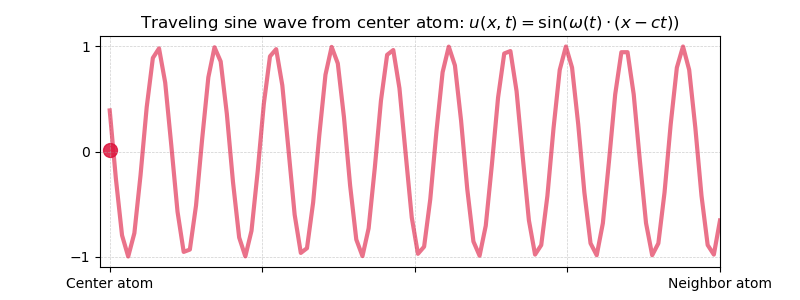

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

# Define the sine function with time-dependent frequency
f = lambda x, t, base_freq=1: np.sin(base_freq * (x - t))

x = np.linspace(-np.pi, np.pi, 100)
y = f(x, 0)

fig, ax = plt.subplots(figsize=(8, 3))
wave, = ax.plot(x, y, "-", color="crimson", lw=3, alpha=0.6)

# Initialize the scatter point at the first x position
scatter = ax.scatter([x[0]], [y[0]], color="crimson", s=100, alpha=0.85)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["Center atom", None, None, None, "Neighbor atom"])

ax.set_yticks((-1, 0, 1))
ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
ax.set_title(r"Traveling sine wave from center atom: $u(x, t) = \sin(\omega(t) \cdot (x - ct))$")
ax.set_xlim(-np.pi-0.1, np.pi)

def shift(t, c=1):
    # Time-dependent frequency
    current_freq = 1 + 0.05 * t  # Adjust this multiplier to change how quickly the frequency changes
    
    # Update the y data of the sine wave with changing frequency
    new_y = f(x, t, base_freq=current_freq)
    wave.set_ydata(new_y)
    
    # Calculate the new position for the scatter point
    new_x = x[0] - c*t
    new_y_scatter = f(new_x, t, base_freq=current_freq)
    scatter.set_offsets([x[0], new_y_scatter])
    
    return wave, scatter  # Return both the line and the scatter

ani = anim.FuncAnimation(fig, shift, frames=190, 
                         fargs=(0.1,),
                         interval=3, blit=True)

# Save animation
ani.save('01_sine_wave_animation_changing_frequency.gif', writer='pillow', fps=30)

# sin waves changing frequency

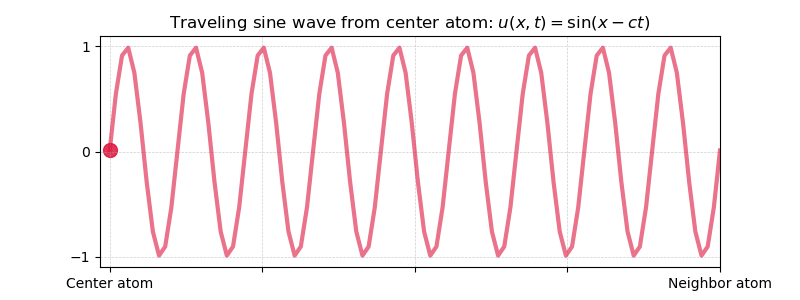

In [83]:
f = lambda x: np.sin(x)
x = np.linspace(-np.pi, np.pi, 100)
y = f(x)

fig, ax = plt.subplots(figsize=(8, 3))
wave, = ax.plot(x, y, "-", color="crimson", lw=3, alpha = 0.6)

# Initialize the scatter point at the first x position
scatter = ax.scatter([x[0]], [y[0]], color="crimson", s=100, alpha = 0.85)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["Center atom", None, None, None, "Neighbor atom"])

ax.set_yticks((-1, 0, 1))
ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
ax.set_title(r"Traveling sine wave from center atom: $u(x, t) = \sin(x - ct)$")
ax.set_xlim(-np.pi-0.1, np.pi)

def shift(a, c=1, t=1):
    # Update the y data of the sine wave
    new_y = f(a*x - c*t)
    wave.set_ydata(new_y)
    
    # Calculate the new position for the scatter point
    new_x = x[0] - c*t
    new_y_scatter = f(new_x)
    scatter.set_offsets([x[0], new_y_scatter])
    
    return wave, scatter  # Return both the line and the scatter

ani = anim.FuncAnimation(fig, shift, frames=190, 
                         fargs=(0.01,),
                         interval=0.1, blit=True)

# Save animation
ani.save('01_sine_frequency_animation.gif', writer='pillow', fps=30)